In [1]:
import fitvelcurve.gal_class as fvc
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, log

## Mock data

In [2]:
#some constants
h = 0.678 #Gaia 2016

G = 6.67430e-11

Msun = 1.98847e30
kpc = 3.0856775814913673e19

fac = 102

rhocrit = 3*(100*h/(kpc))**2/(8*np.pi*G) * kpc**3 / Msun

def delc(c):
    return (fac/3)*c**3/(log(1+c)-c/(1+c))
    

def mass_nfw(r, mvir, cvir):
    
    rv = (mvir/((4/3) * pi * fac * rhocrit))**(1/3)
    
    rs = rv / cvir
    
    rhos = rhocrit*delc(cvir)
    
    return 4 * pi *  rhos * rs**3 * (log((r + rs) / rs) + rs/(r + rs) - 1) 

def velocity(x, mass, c):
    return np.sqrt(G * Msun * mass_nfw(x, mass, c) / x/kpc) / 1e3


#Mock data ------------------------
# distance
data_r = np.linspace(1e-1, 10, 20)
# velocity
vcen = velocity(data_r, 5e10, 15)
# errror
verr = (velocity(data_r, 5e10*1.1, 15*1.1) - velocity(data_r, 5e10*0.9, 15*0.9))/2

## Plot Rotation Curve using mock data

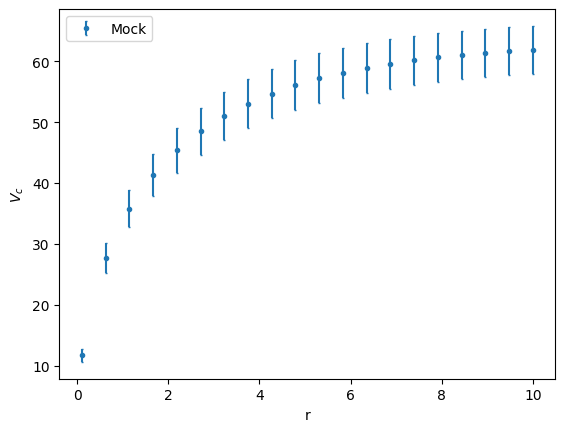

In [3]:
plt.errorbar(data_r, vcen, verr, marker='.', linestyle='', capsize=True, label='Mock')
plt.xlabel('r')
plt.ylabel('$V_c$')
plt.legend()

# Generate an instance of the `fitvelcurve.gal_class.Galaxy` class

In [4]:
test_obj = fvc.Galaxy(data_r, data_vel = vcen, data_err = verr)

# Results from dynesty fit

iter: 15162 | batch: 8 | bound: 4 | nc: 1 | ncall: 41437 | eff(%): 36.297 | loglstar: -4.958 < -0.002 < -0.539 | logz: -7.450 +/-  0.066 | stop:  0.912                                               

number of iterations =  15162


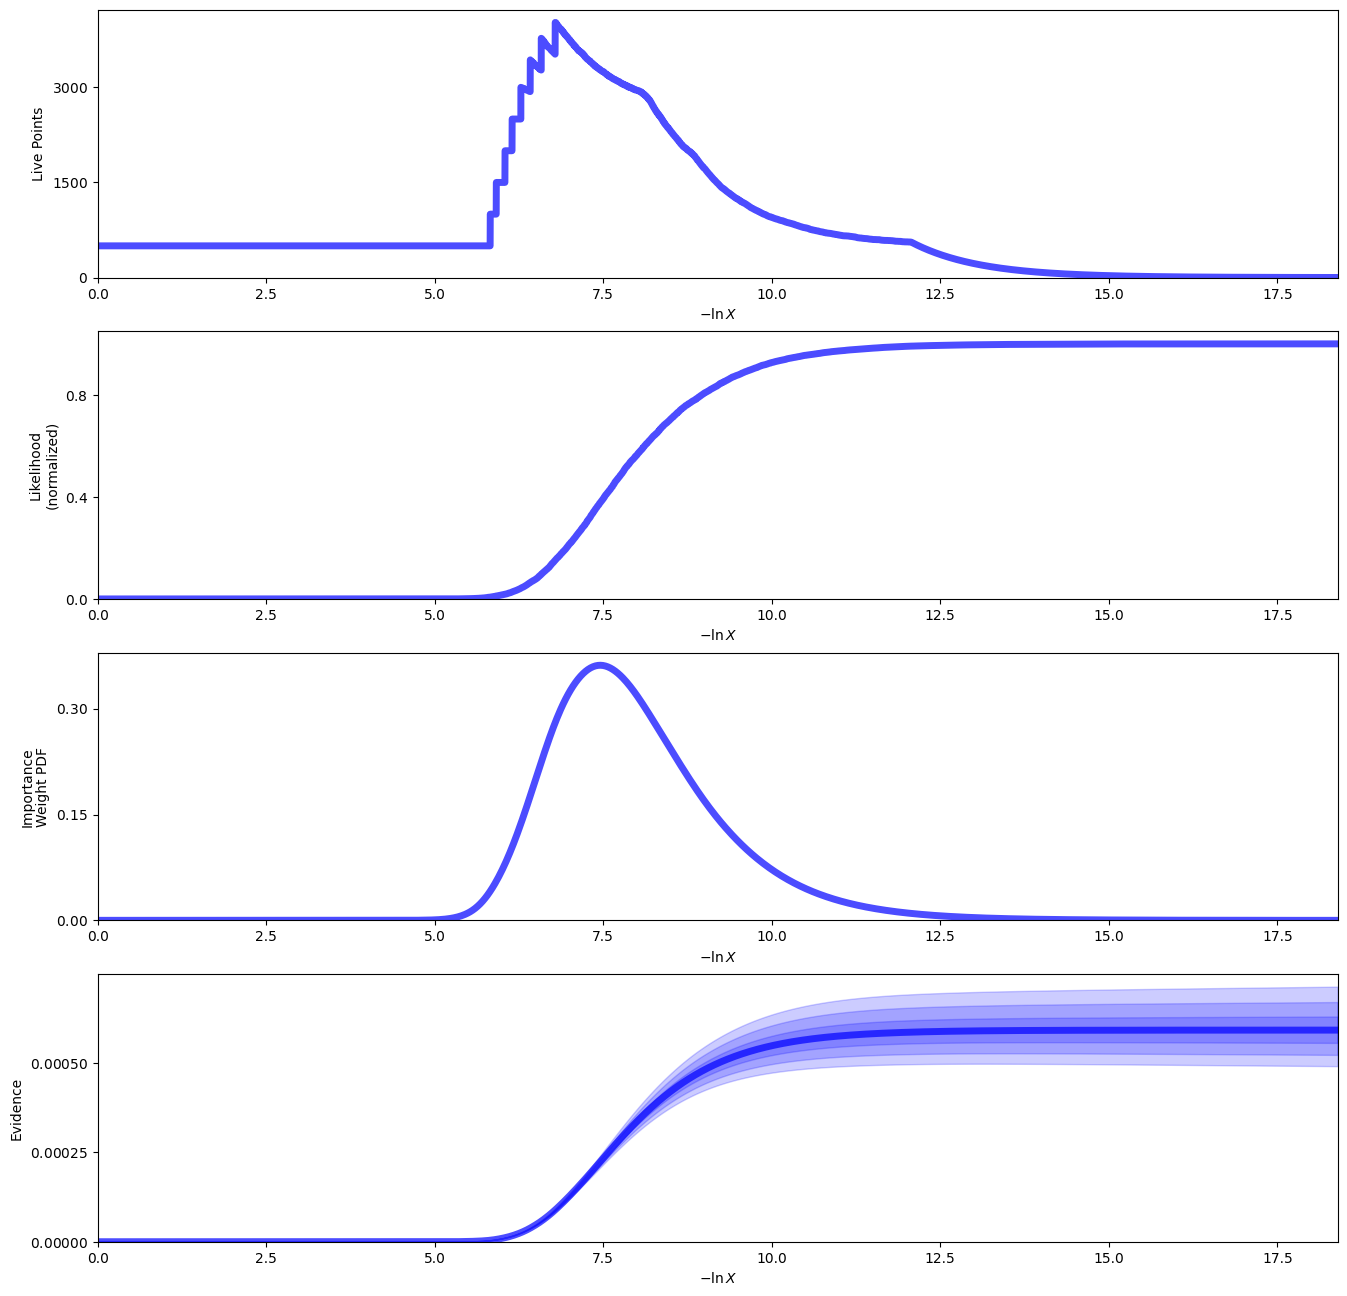

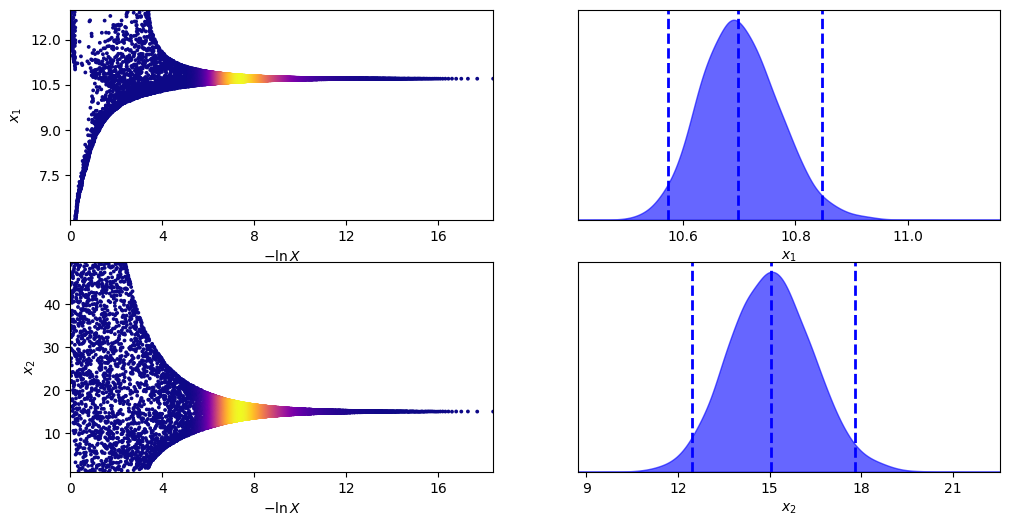

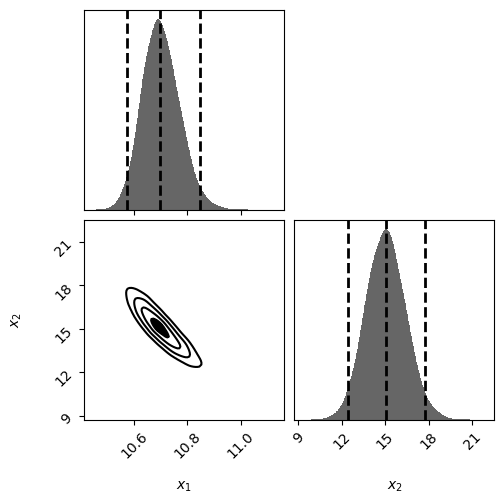

In [5]:
test_sampler = test_obj.run_sampler()

# Best-fit results

In [6]:
logMh, c = test_sampler.results.samples[-1] #best-fit (maximum posterior) paramerers

In [7]:
test_obj2 = fvc.Galaxy(data_r, 10**logMh, c, data_vel = vcen, data_err = verr)

In [8]:
print("best-fit Mh [10^10 Msun], c = ", 10**logMh / 1e10, " ", c)

best-fit Mh [10^10 Msun], c =  5.005413024735304   15.00964019030636


In [9]:
vel_fit = test_obj2.velocity() #best-fit rotation curve

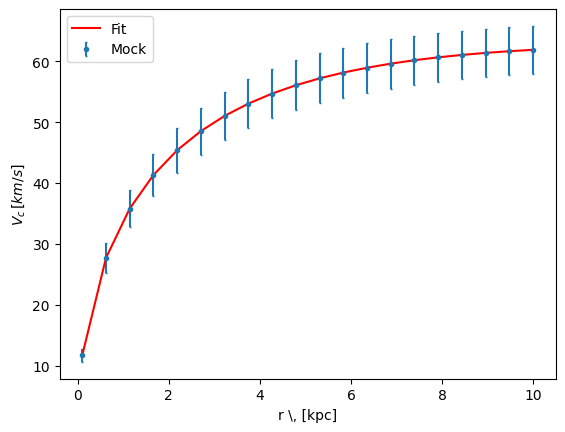

In [10]:
plt.errorbar(data_r, vcen, verr, marker='.', linestyle='', capsize=True, label='Mock')
plt.plot(data_r, vel_fit, color= 'red', label='Fit')
plt.xlabel('r \, [kpc]')
plt.ylabel('$V_c \, [km/s]$')
plt.legend()

# Mass

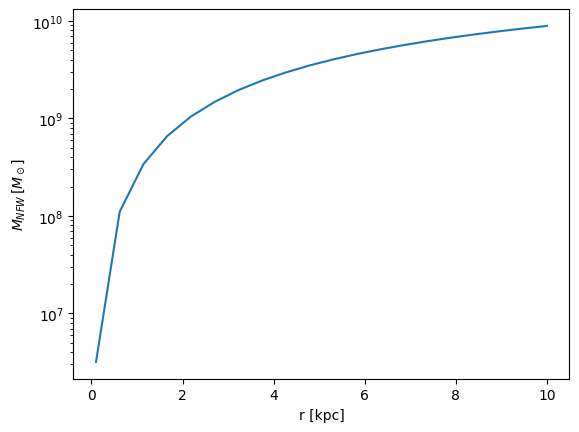

In [11]:
m_nfw = test_obj2.mass_nfw()

plt.plot(data_r, m_nfw)
plt.xlabel('r [kpc]')
plt.ylabel('$M_{NFW} \, [M_\odot]$')
plt.yscale('log')